# Import Required Libraries

---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load The Dataset

---



In [4]:
df = pd.read_csv('train[1].csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Info About The DataFrame

---



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Cleaning The DataFrame

---

Missing values in dataframe

In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Handle Missing Values In Age, Cabin & Embarked

In [36]:
# Age
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

# Cabin
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

# Embarked
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Exploratory Data Analysis (EDA)

---



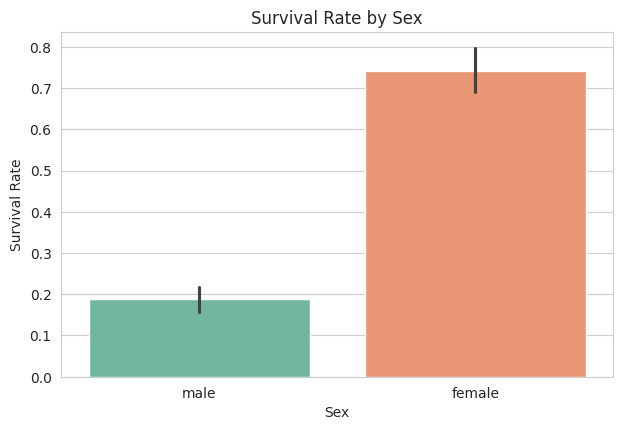

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Plotting Survival by Sex
plt.subplot(2, 2, 1)
sns.barplot(x='Sex', y='Survived', hue='Sex', data=df, palette='Set2', legend=False)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

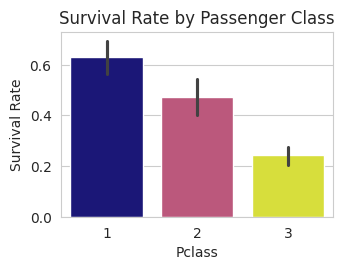

In [31]:
# Plotting Survival by Passenger Class (Pclass)
plt.subplot(2, 2, 2)
sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=df, palette='plasma', legend=False)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

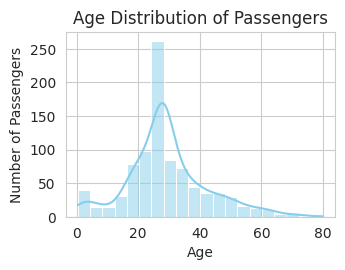

In [32]:
# Plotting Age Distribution
plt.subplot(2, 2, 3) # This is the 3rd plot
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()

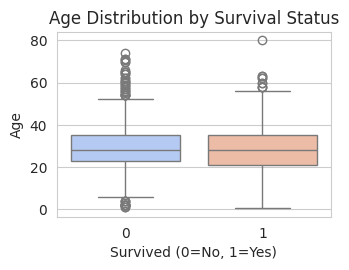

In [33]:
# Plotting Age Distribution by Survival Status
plt.subplot(2, 2, 4) # This is the 4th plot
sns.boxplot(x='Survived', y='Age', hue='Survived', data=df, palette='coolwarm', legend=False)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()